In [10]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import pandas_profiling

import seaborn as sns
sns.set()


import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../data/Sales_Multiseries_training.csv")
data.columns

Index(['Store', 'Date', 'Sales', 'Store_Size', 'Num_Employees', 'Returns_Pct',
       'Num_Customers', 'Pct_On_Sale', 'Marketing', 'Near_Xmas',
       'Near_BlackFriday', 'Holiday', 'DestinationEvent', 'Pct_Promotional',
       'Econ_ChangeGDP', 'EconJobsChange', 'AnnualizedCPI'],
      dtype='object')

__Where are the stores? How distant are they__

In [4]:
data.head()

,Store,Date,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,Holiday,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Louisville,07/01/12,76819.40,20100,42,1.03,327,9.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,0.5,NaN,0.02
1,Louisville,07/02/12,78963.86,20100,21,0.41,293,8.65,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
2,Louisville,07/03/12,74824.71,20100,26,0.31,356,8.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
3,Louisville,07/04/12,78523.92,20100,33,0.83,350,10.08,July In Store Credit Card Signup Discount; In ...,0,0,Yes,No,0.000047,NaN,NaN,NaN
4,Louisville,07/05/12,76445.90,20100,38,0.51,299,9.80,July In Store Credit Card Signup Discount; ID5...,0,0,No,No,0.000047,NaN,NaN,NaN


In [3]:
data.Store.unique()

array(['Louisville', 'Philadelphia', 'Detroit', 'Savannah', 'Portland',
       'Columbus', 'Richmond', 'Lancaster', 'Baltimore', 'San Antonio'],
      dtype=object)

In [4]:
data.groupby(['Store']).size()

Store
Baltimore       714
Columbus        714
Detroit         714
Lancaster       714
Louisville      714
Philadelphia    714
Portland        714
Richmond        714
San Antonio     714
Savannah        714
dtype: int64

__714 sales in all the 10 stores = 7140__

In [5]:
# lets bring in the the week when the sale happened
data["date_"] = pd.to_datetime(arg=data.Date)
data["week"] = data['date_'].dt.week
data["month"] = data['date_'].dt.month
data["year"] = data['date_'].dt.year

In [6]:
data["year"].unique()

data12 = data[data.year == 2012]
data13 = data[data.year == 2013]
data14 = data[data.year == 2014]

array([2012, 2013, 2014])

In [7]:
locations_week_grouping = data.groupby(['Store','year','week'])['Sales'].sum().reset_index(name="sum_sales")

__Which locations are more popular?/ Which weeks are the best for sales?__

Text(0.5, 1.0, '2012')

Text(0.5, 1.0, '2013')

Text(0.5, 1.0, '2014')

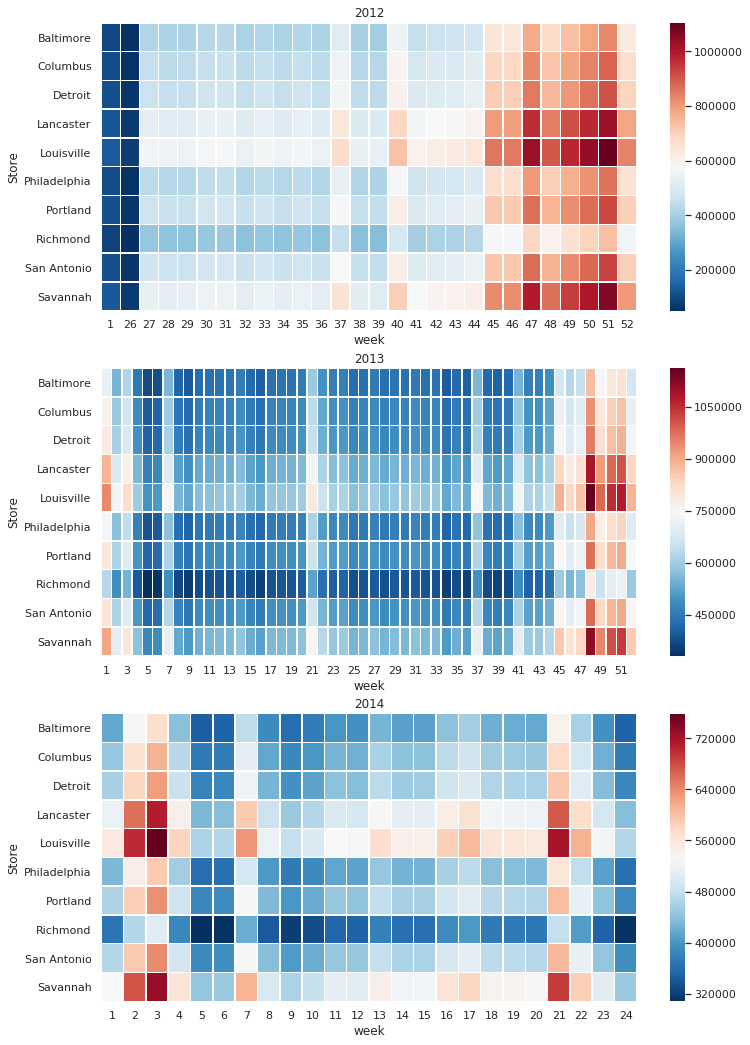

In [11]:
locations_week_grouping12 = locations_week_grouping[locations_week_grouping.year == 2012]
locations_week_grouping13 = locations_week_grouping[locations_week_grouping.year == 2013]
locations_week_grouping14 = locations_week_grouping[locations_week_grouping.year == 2014]

data_pivoted1 = locations_week_grouping12.pivot("Store",
                                               "week",
                                               "sum_sales")

data_pivoted2 = locations_week_grouping13.pivot("Store",
                                               "week",
                                               "sum_sales")

data_pivoted3 = locations_week_grouping14.pivot("Store",
                                               "week",
                                               "sum_sales")
f = plt.figure(figsize=(12,18))

ax1 = f.add_subplot(311)
sns.set(rc={'figure.figsize':(25,20)})
g1 = sns.heatmap(data_pivoted1, linewidths=.5, cmap = "RdBu_r")
ax1.set_title("2012")

ax2 = f.add_subplot(312)
sns.set(rc={'figure.figsize':(25,20)})
g2 = sns.heatmap(data_pivoted2, linewidths=.5, cmap = "RdBu_r")
ax2.set_title("2013")


ax3 = f.add_subplot(313)
sns.set(rc={'figure.figsize':(25,20)})
g3 = sns.heatmap(data_pivoted3, linewidths=.5, cmap = "RdBu_r")
ax3.set_title("2014")


plt.show()

__Maximum sales occur around the end of year during 2012 and 2013. Least of the sales around the weeks 25, 26(June 18,June 24__

__Store with most sales: Savannah, Louisville, Lanscaster__

In [12]:
f.savefig('foo.png')

__Is the allocation of number of employees good during different periods (weekly average number of employees)?__

In [13]:
weekly_grouped_avgemployees12 = data12.groupby(['Store','year','week'])['Num_Employees'].mean().reset_index(name="avg_num_employes")
weekly_grouped_avgemployees13 = data13.groupby(['Store','year','week'])['Num_Employees'].mean().reset_index(name="avg_num_employes")
weekly_grouped_avgemployees14 = data14.groupby(['Store','year','week'])['Num_Employees'].mean().reset_index(name="avg_num_employes")

In [15]:
## year 2012

emp_savannah12 = weekly_grouped_avgemployees12[weekly_grouped_avgemployees12.Store == 'Savannah']
emp_louisville12 = weekly_grouped_avgemployees12[weekly_grouped_avgemployees12.Store == 'Louisville']
emp_lancaster12 = weekly_grouped_avgemployees12[weekly_grouped_avgemployees12.Store == 'Lancaster']

sales_savannah12 = locations_week_grouping12[locations_week_grouping12.Store == 'Savannah']
sales_louisville12 = locations_week_grouping12[locations_week_grouping12.Store == 'Louisville']
sales_lancaster12 = locations_week_grouping12[locations_week_grouping12.Store == 'Lancaster']

## year 2013

emp_savannah13 = weekly_grouped_avgemployees13[weekly_grouped_avgemployees13.Store == 'Savannah']
emp_louisville13 = weekly_grouped_avgemployees13[weekly_grouped_avgemployees13.Store == 'Louisville']
emp_lancaster13 = weekly_grouped_avgemployees13[weekly_grouped_avgemployees13.Store == 'Lancaster']

sales_savannah13 = locations_week_grouping13[locations_week_grouping13.Store == 'Savannah']
sales_louisville13 = locations_week_grouping13[locations_week_grouping13.Store == 'Louisville']
sales_lancaster13 = locations_week_grouping13[locations_week_grouping13.Store == 'Lancaster']

## year 2014

emp_savannah14 = weekly_grouped_avgemployees14[weekly_grouped_avgemployees14.Store == 'Savannah']
emp_louisville14 = weekly_grouped_avgemployees14[weekly_grouped_avgemployees14.Store == 'Louisville']
emp_lancaster14 = weekly_grouped_avgemployees14[weekly_grouped_avgemployees14.Store == 'Lancaster']

sales_savannah14 = locations_week_grouping14[locations_week_grouping14.Store == 'Savannah']
sales_louisville14 = locations_week_grouping14[locations_week_grouping14.Store == 'Louisville']
sales_lancaster14 = locations_week_grouping14[locations_week_grouping14.Store == 'Lancaster']

<BarContainer object of 28 artists>

Text(0.5, 1.0, '2012')

<BarContainer object of 52 artists>

Text(0.5, 1.0, '2013')

<BarContainer object of 24 artists>

Text(0.5, 1.0, '2014')

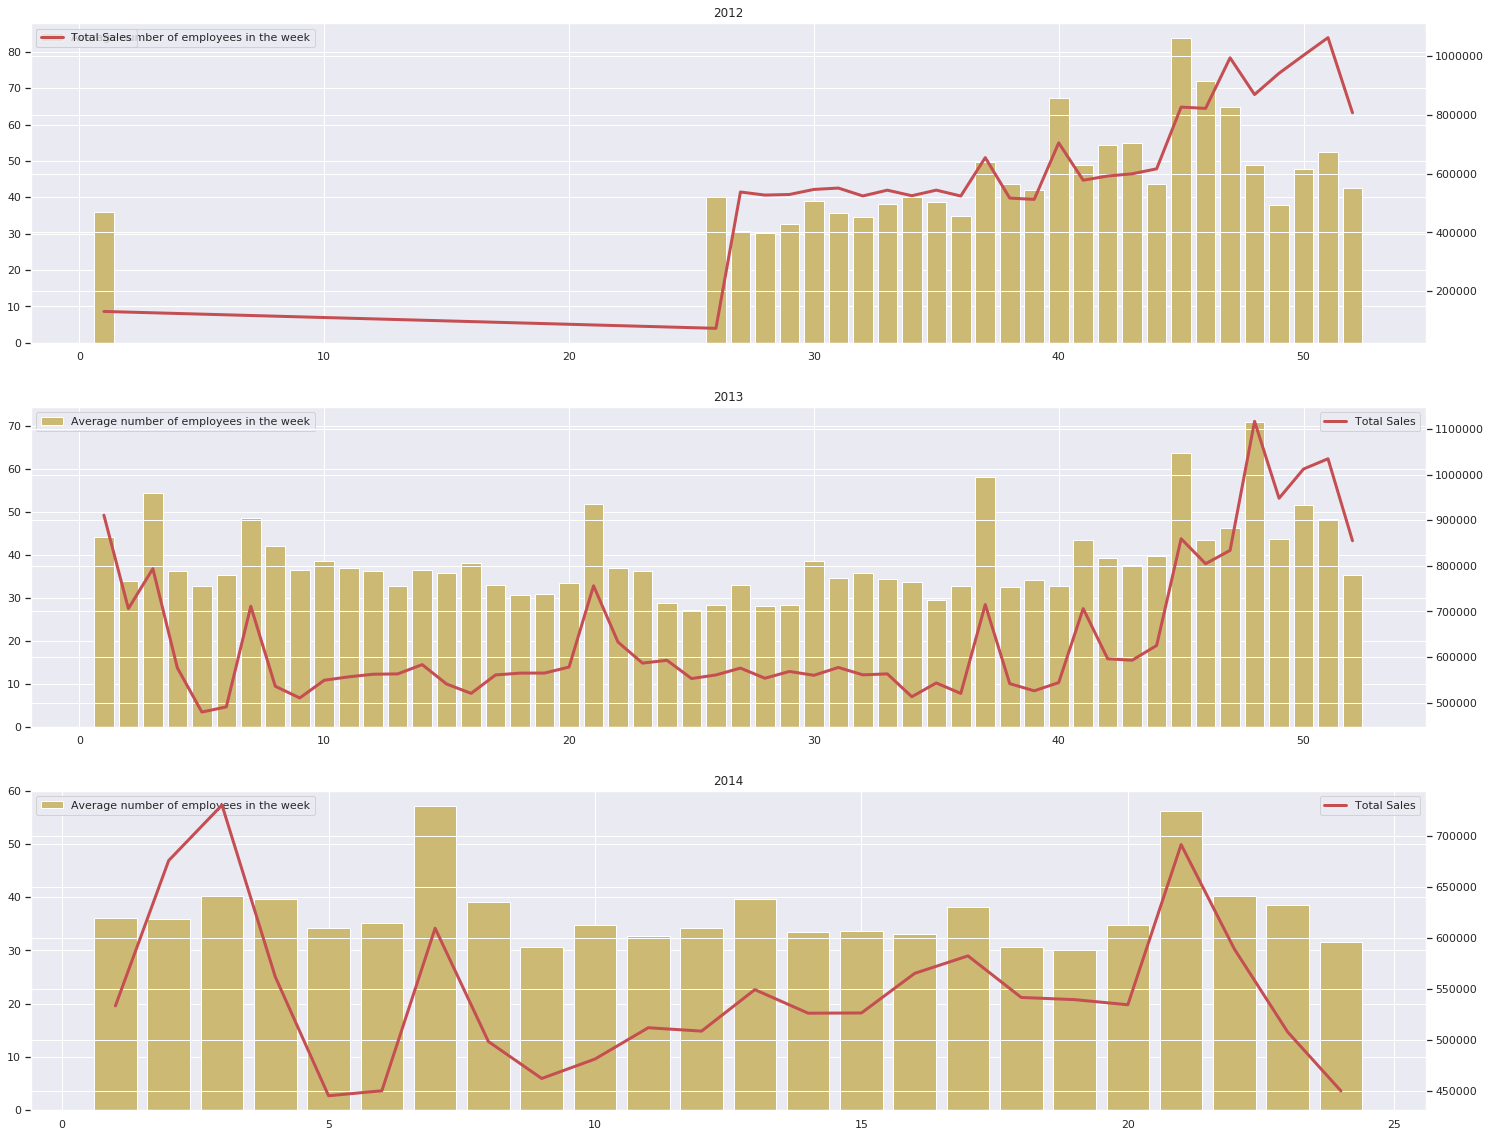

In [16]:
f = plt.figure()

ax11 = f.add_subplot(311)
ax11.bar(emp_savannah12["week"], emp_savannah12["avg_num_employes"], color='y', label="Average number of employees in the week")
ax12 = ax11.twinx()
ax12.plot(sales_savannah12["week"],sales_savannah12['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax11.set_title("2012")

ax21 = f.add_subplot(312)
ax21.bar(emp_savannah13["week"], emp_savannah13["avg_num_employes"], color='y', label="Average number of employees in the week")
ax22 = ax21.twinx()
ax22.plot(sales_savannah13["week"],sales_savannah13['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax21.set_title("2013")

ax31 = f.add_subplot(313)
ax31.bar(emp_savannah14["week"], emp_savannah14["avg_num_employes"], color='y', label="Average number of employees in the week")
ax32 = ax31.twinx()
ax32.plot(sales_savannah14["week"],sales_savannah14['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax31.set_title("2014")

ax11.legend()
ax12.legend()
ax21.legend()
ax22.legend()
ax31.legend()
ax32.legend()

__Savannah__

In [17]:
f.savefig("savannah-trends.png")

<BarContainer object of 28 artists>

Text(0.5, 1.0, '2012')

<BarContainer object of 52 artists>

Text(0.5, 1.0, '2013')

<BarContainer object of 24 artists>

Text(0.5, 1.0, '2014')

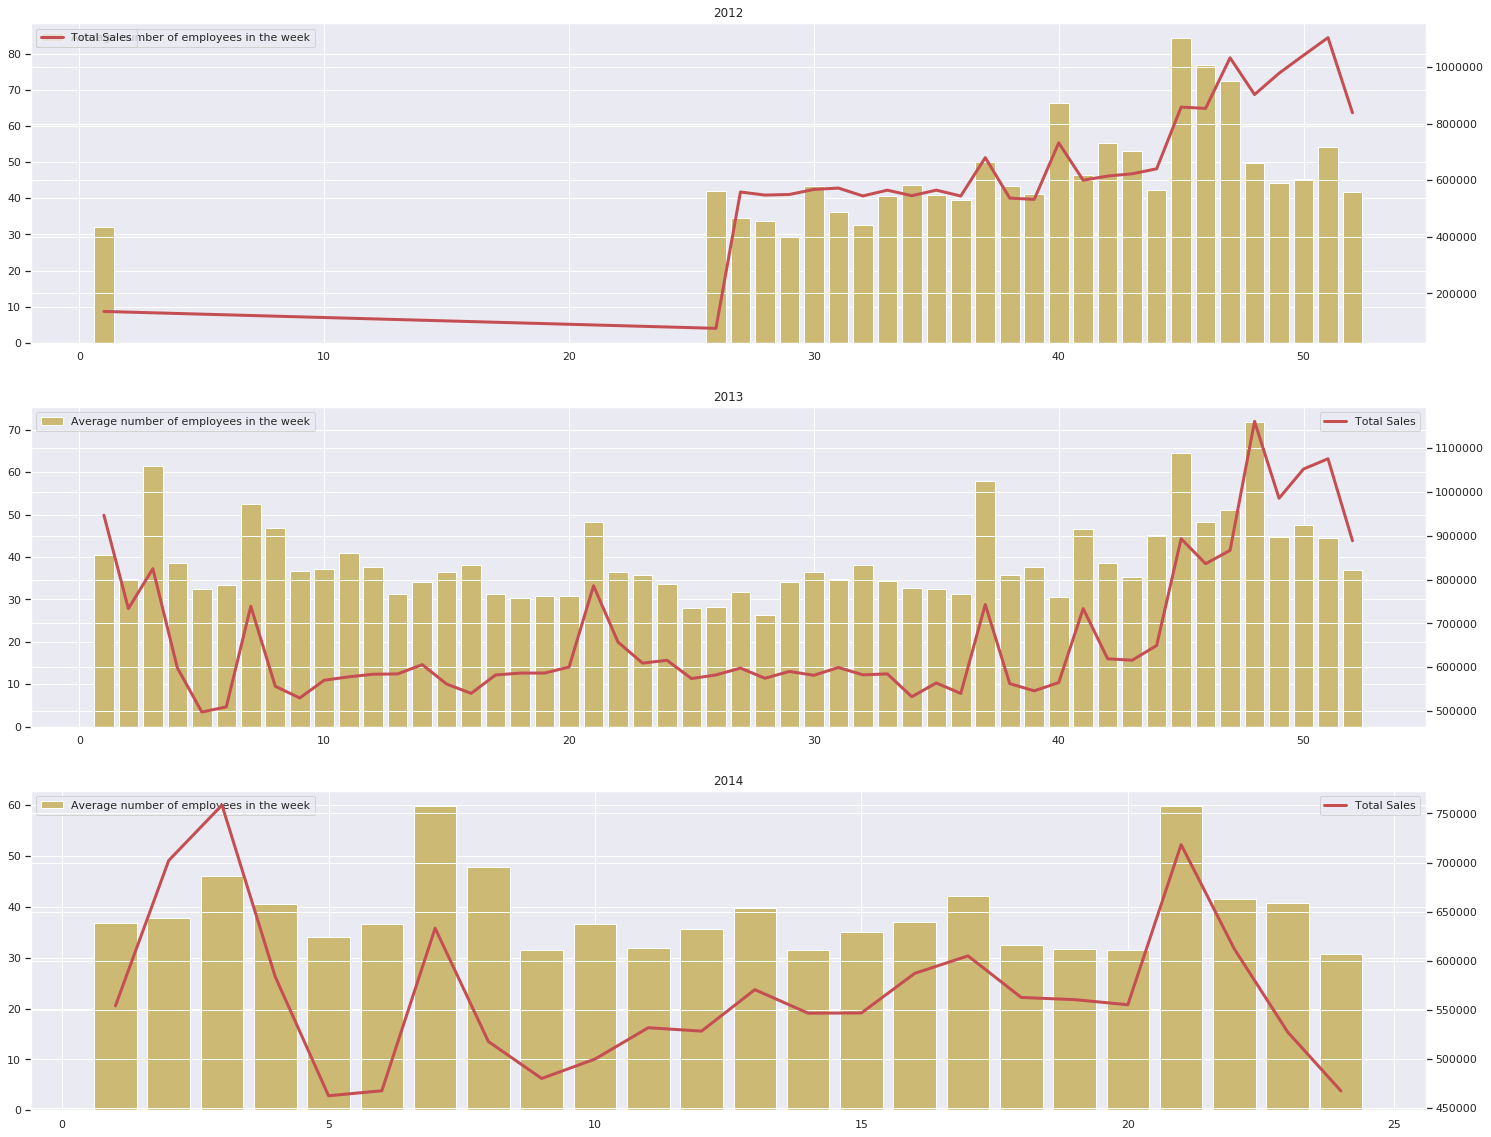

In [18]:
f = plt.figure()

ax11 = f.add_subplot(311)
ax11.bar(emp_louisville12["week"], emp_louisville12["avg_num_employes"], color='y', label="Average number of employees in the week")
ax12 = ax11.twinx()
ax12.plot(sales_louisville12["week"],sales_louisville12['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax11.set_title("2012")

ax21 = f.add_subplot(312)
ax21.bar(emp_louisville13["week"], emp_louisville13["avg_num_employes"], color='y', label="Average number of employees in the week")
ax22 = ax21.twinx()
ax22.plot(sales_louisville13["week"],sales_louisville13['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax21.set_title("2013")

ax31 = f.add_subplot(313)
ax31.bar(emp_louisville14["week"], emp_louisville14["avg_num_employes"], color='y', label="Average number of employees in the week")
ax32 = ax31.twinx()
ax32.plot(sales_louisville14["week"],sales_louisville14['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax31.set_title("2014")

ax11.legend()
ax12.legend()
ax21.legend()
ax22.legend()
ax31.legend()
ax32.legend()



__Louisville__

In [19]:
f.savefig("louisville-trends.png")

<BarContainer object of 28 artists>

Text(0.5, 1.0, '2012')

<BarContainer object of 52 artists>

Text(0.5, 1.0, '2013')

<BarContainer object of 24 artists>

Text(0.5, 1.0, '2014')

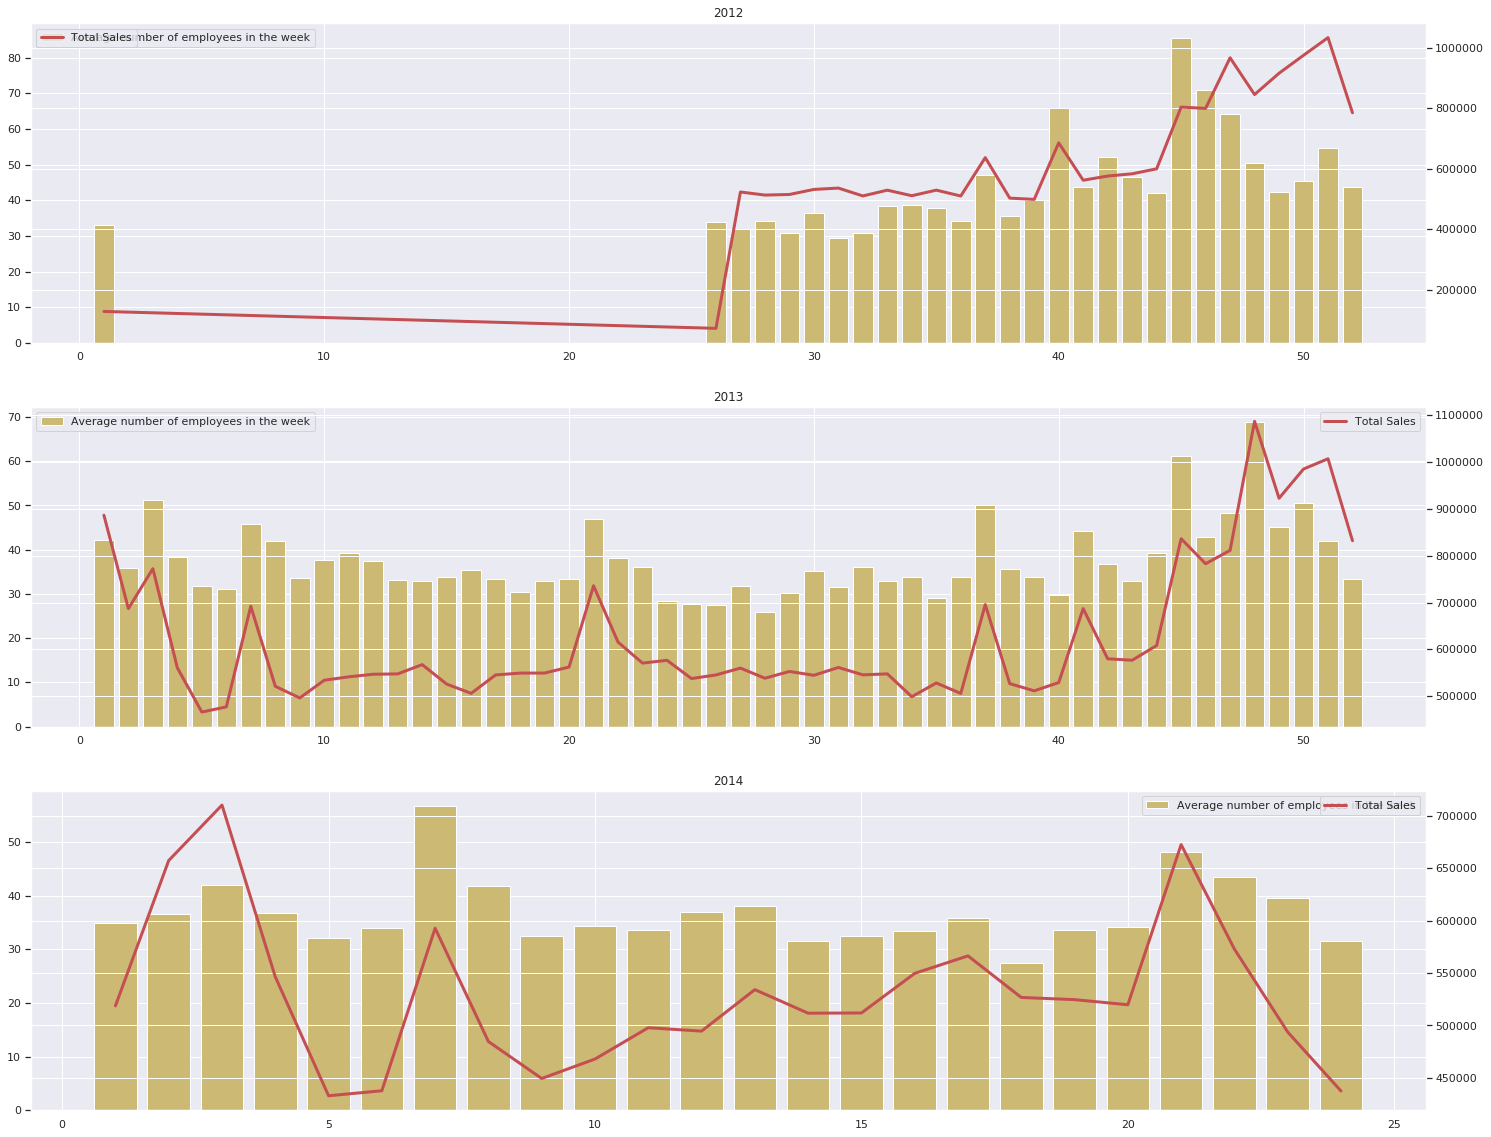

In [20]:
f = plt.figure()

ax11 = f.add_subplot(311)
ax11.bar(emp_lancaster12["week"], emp_lancaster12["avg_num_employes"], color='y', label="Average number of employees in the week")
ax12 = ax11.twinx()
ax12.plot(sales_lancaster12["week"],sales_lancaster12['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax11.set_title("2012")

ax21 = f.add_subplot(312)
ax21.bar(emp_lancaster13["week"], emp_lancaster13["avg_num_employes"], color='y', label="Average number of employees in the week")
ax22 = ax21.twinx()
ax22.plot(sales_lancaster13["week"],sales_lancaster13['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax21.set_title("2013")

ax31 = f.add_subplot(313)
ax31.bar(emp_lancaster14["week"], emp_lancaster14["avg_num_employes"], color='y', label="Average number of employees in the week")
ax32 = ax31.twinx()
ax32.plot(sales_lancaster14["week"],sales_lancaster14['sum_sales'], color="r", linewidth=3.0, label="Total Sales")
ax31.set_title("2014")

ax11.legend()
ax12.legend()
ax21.legend()
ax22.legend()
ax31.legend()
ax32.legend()

__Lancaster__

In [21]:
f.savefig("lancaster-trends.png")

__We have very similar trends for the three places.__

__In Louisville 2012, there is a lot more employees anticipated (even more than what was there for thanksgiving, but the sales, but there wasnt an corresponding amount of raise in sales__

__Destination events at certain store locations__

In [25]:
#baltimore - select the weeks where destination event is true
data_baltimore_destination_event = data13[(data.Store == "Baltimore") & (data.DestinationEvent == "Yes")]
print(data_baltimore_destination_event.week.unique())
data_portland_destination_event = data13[(data.Store == "Portland") & (data.DestinationEvent == "Yes")]
print(data_portland_destination_event.week.unique())
data_richmond_destination_event = data13[(data.Store == "Richmond") & (data.DestinationEvent == "Yes")]
print(data_richmond_destination_event.week.unique())

# Why are these the same for all places??

[ 3  4  7  8 21 22 37 41 42 45 46]
[ 3  4  7  8 21 22 37 41 42 45 46]
[ 3  4  7  8 21 22 37 41 42 45 46]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [26]:
# grp_baltimore = locations_week_grouping[locations_week_grouping.Store == "Baltimore"]
# grp_portland = locations_week_grouping[locations_week_grouping.Store == "Portland"]
# grp_richmond = locations_week_grouping[locations_week_grouping.Store == "Richmond"]

# f = plt.figure(figsize=(20,18))
# plt.tight_layout()

# ax1 = f.add_subplot(311)
# ax1.plot(grp_baltimore["week"], grp_baltimore["sum_sales"], color='y', marker='o',label="Baltimore")
# ax1.set_xlabel("Week")
# ax1.set_ylabel("Total Sales")
# ax1.set_title("Weekly Sales - Baltimore")

# ax2 = f.add_subplot(312)
# ax2.plot(grp_portland["week"], grp_portland["sum_sales"], color='b', marker='o', label="Portland")
# ax2.set_xlabel("Week")
# ax2.set_ylabel("Total Sales")
# ax2.set_title("Weekly Sales - Portland")

# ax3 = f.add_subplot(313)
# ax3.plot(grp_richmond["week"], grp_richmond["sum_sales"], color='r', marker='o', label="Richmond")
# ax3.set_xlabel("Week")
# ax3.set_ylabel("Weekly Sales - Richmond")

# plt.show()